In [1]:
#imports
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine, inspect, text, func

In [2]:
#create engine using 'cali_wildfires.sqlite' database file
engine = create_engine("sqlite:///cali_wildfires.sqlite")

In [3]:
#create the inspector and connect it to the engine
inspector = inspect(engine)

#collect the names of tables within the database
tables = inspector.get_table_names()

#use the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

cali_wildfires
--------
AcresBurned FLOAT
Active BOOLEAN
AdminUnit TEXT
AirTankers FLOAT
ArchiveYear BIGINT
CalFireIncident BOOLEAN
CanonicalUrl TEXT
ConditionStatement TEXT
ControlStatement TEXT
Counties TEXT
CountyIds TEXT
CrewsInvolved FLOAT
Dozers FLOAT
Engines FLOAT
Extinguished TIMESTAMP
Fatalities FLOAT
Featured BOOLEAN
Final BOOLEAN
FuelType TEXT
Helicopters FLOAT
Injuries FLOAT
Latitude FLOAT
Location TEXT
Longitude FLOAT
MajorIncident BOOLEAN
Name TEXT
PercentContained FLOAT
PersonnelInvolved FLOAT
Public BOOLEAN
SearchDescription TEXT
SearchKeywords TEXT
Started TIMESTAMP
Status TEXT
StructuresDamaged FLOAT
StructuresDestroyed FLOAT
StructuresEvacuated FLOAT
StructuresThreatened FLOAT
UniqueId TEXT
Updated TIMESTAMP
WaterTenders FLOAT
YearStarted INTEGER
MonthStarted INTEGER



In [4]:
#SQL
con = engine.connect()

In [5]:
# number of wildfires started per year
#### I have NO IDEA why 1969 is showing up. It was deleted in the database. rawr.
query = text ("""SELECT
                    YearStarted as year,
                    count(UniqueID) as num_wildfires
                    FROM
                        cali_wildfires
                    GROUP BY
                        YearStarted
                    ORDER BY
                        YearStarted asc;""")
PerYear = pd.read_sql(query, con = con)
PerYear.head()

,year,num_wildfires
0,1969,2
1,2013,972
2,2014,702
3,2015,912
4,2016,1110


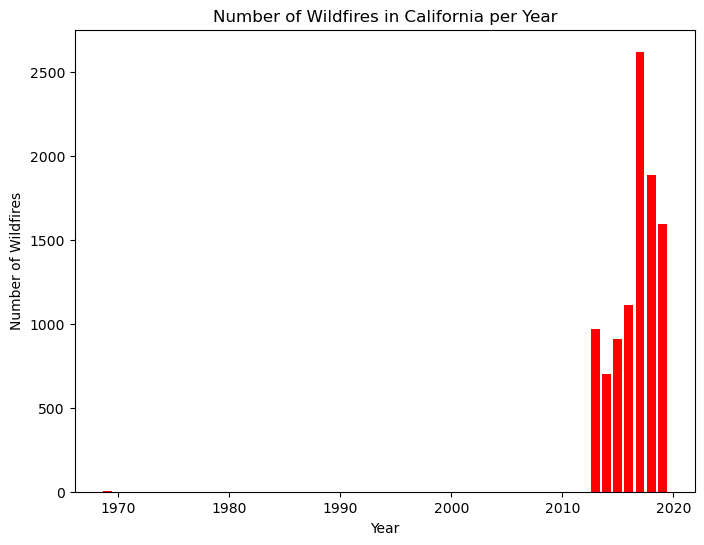

In [6]:
#num of wildfires per year plot
plt.figure(figsize=(8, 6))
plt.bar(PerYear.year, PerYear.num_wildfires, color="red")
plt.title("Number of Wildfires in California per Year")
plt.xlabel("Year")
plt.ylabel("Number of Wildfires")
plt.show()

In [7]:
# number of wildfires started per month
#### I have NO IDEA why 1969 is showing up. It was deleted in the database. rawr.
query = text ("""SELECT
                    MonthStarted as month,
                    count(UniqueID) as num_wildfires
                    FROM
                        cali_wildfires
                    GROUP BY
                        MonthStarted
                    ORDER BY
                        MonthStarted asc;""")
PerMonth = pd.read_sql(query, con = con)
PerMonth.head()

,month,num_wildfires
0,1,66
1,2,60
2,3,36
3,4,210
4,5,840


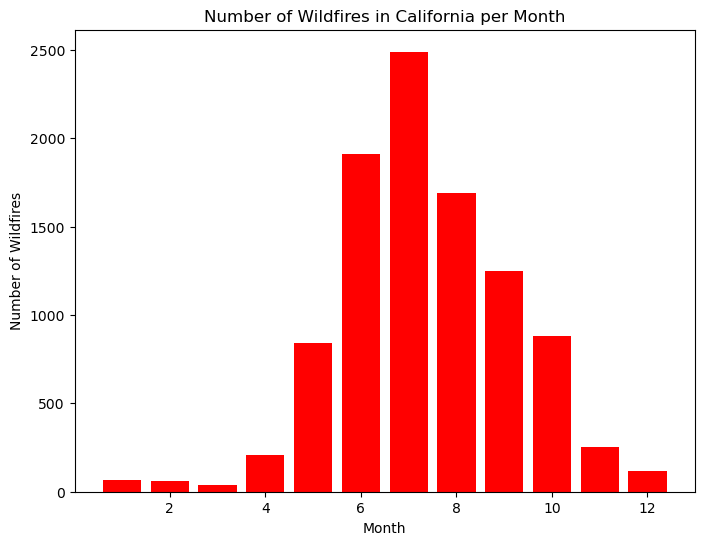

In [8]:
#num of wildfires per month plot

plt.figure(figsize=(8, 6))
plt.bar(PerMonth.month, PerMonth.num_wildfires, color="red")
plt.title("Number of Wildfires in California per Month")
plt.xlabel("Month")
plt.ylabel("Number of Wildfires")
plt.show()

In [11]:
# number of wildfires per county
query = text ("""SELECT
                    Counties as county,
                    count(CountyIds) as num_wildfires
                    FROM
                        cali_wildfires
                    GROUP BY
                        Counties
                    ORDER BY
                        Counties asc;""")
PerCounty = pd.read_sql(query, con = con)
PerCounty.head()

,county,num_wildfires
0,Alameda,192
1,Alpine,12
2,Amador,78
3,Butte,396
4,Calaveras,132


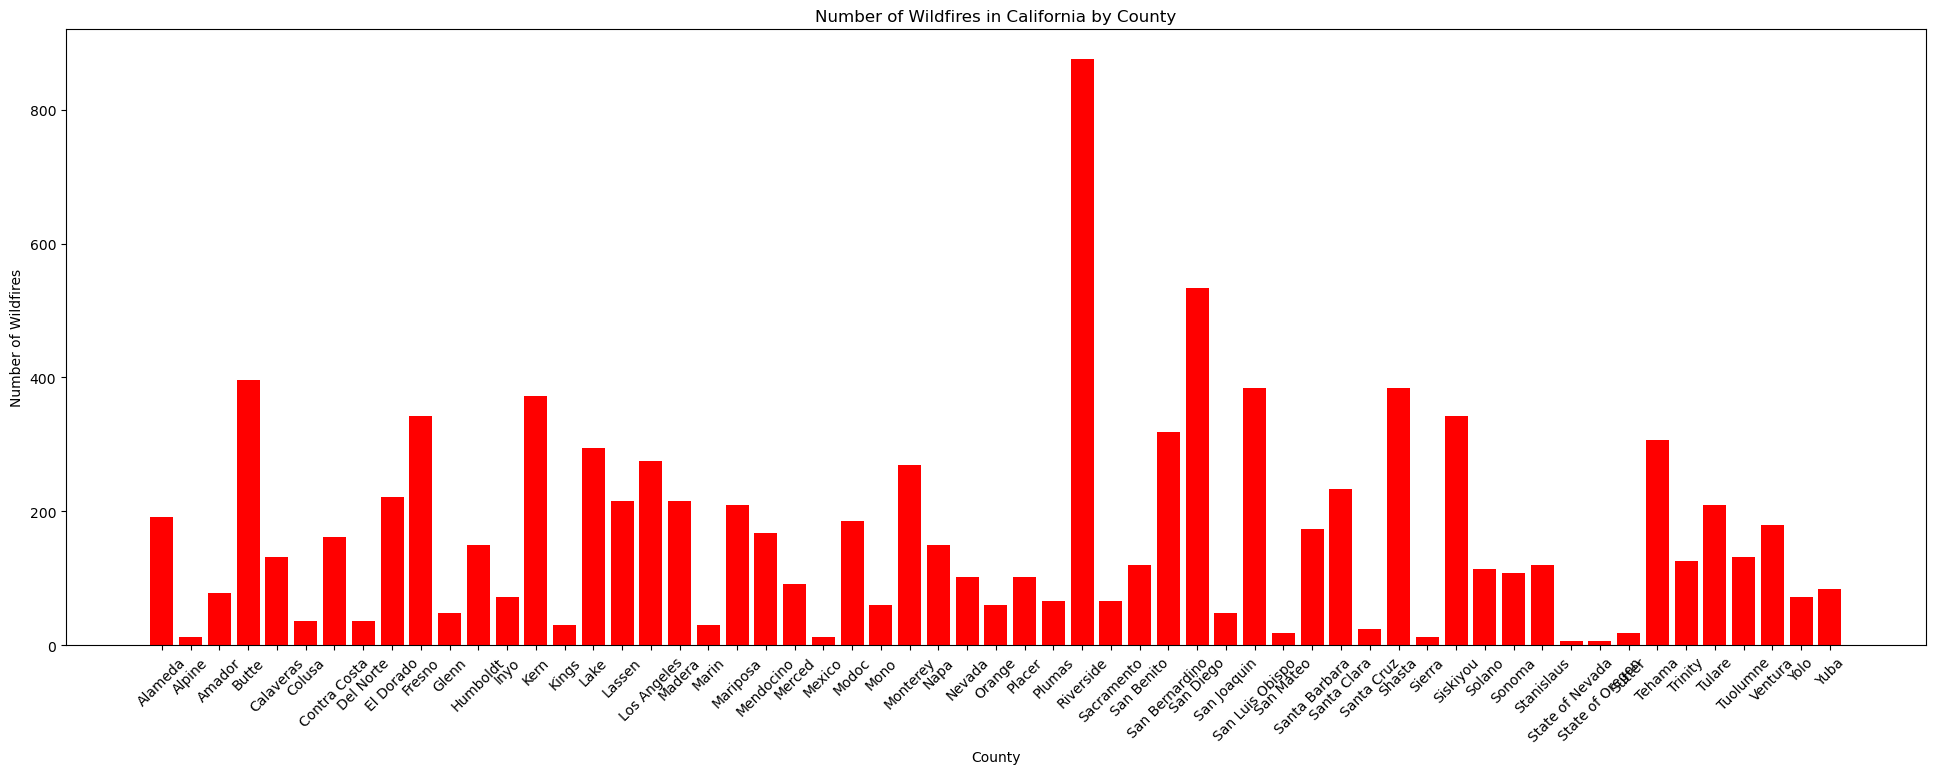

In [18]:
#num of wildfires per county plot

plt.figure(figsize=(24, 8))
plt.bar(PerCounty.county, PerCounty.num_wildfires, color="red")
plt.title("Number of Wildfires in California by County")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.ylabel("Number of Wildfires")
plt.show()


In [26]:
# acres burned per county
query = text ("""SELECT
                    Counties as county,
                    SUM(AcresBurned) as acres_burned
                    FROM
                        cali_wildfires
                    GROUP BY
                        Counties
                    ORDER BY
                        Counties asc;""")
AcresBurned = pd.read_sql(query, con = con)
AcresBurned.head()

,county,acres_burned
0,Alameda,38322.0
1,Alpine,0.0
2,Amador,37710.0
3,Butte,1144212.0
4,Calaveras,15888.0


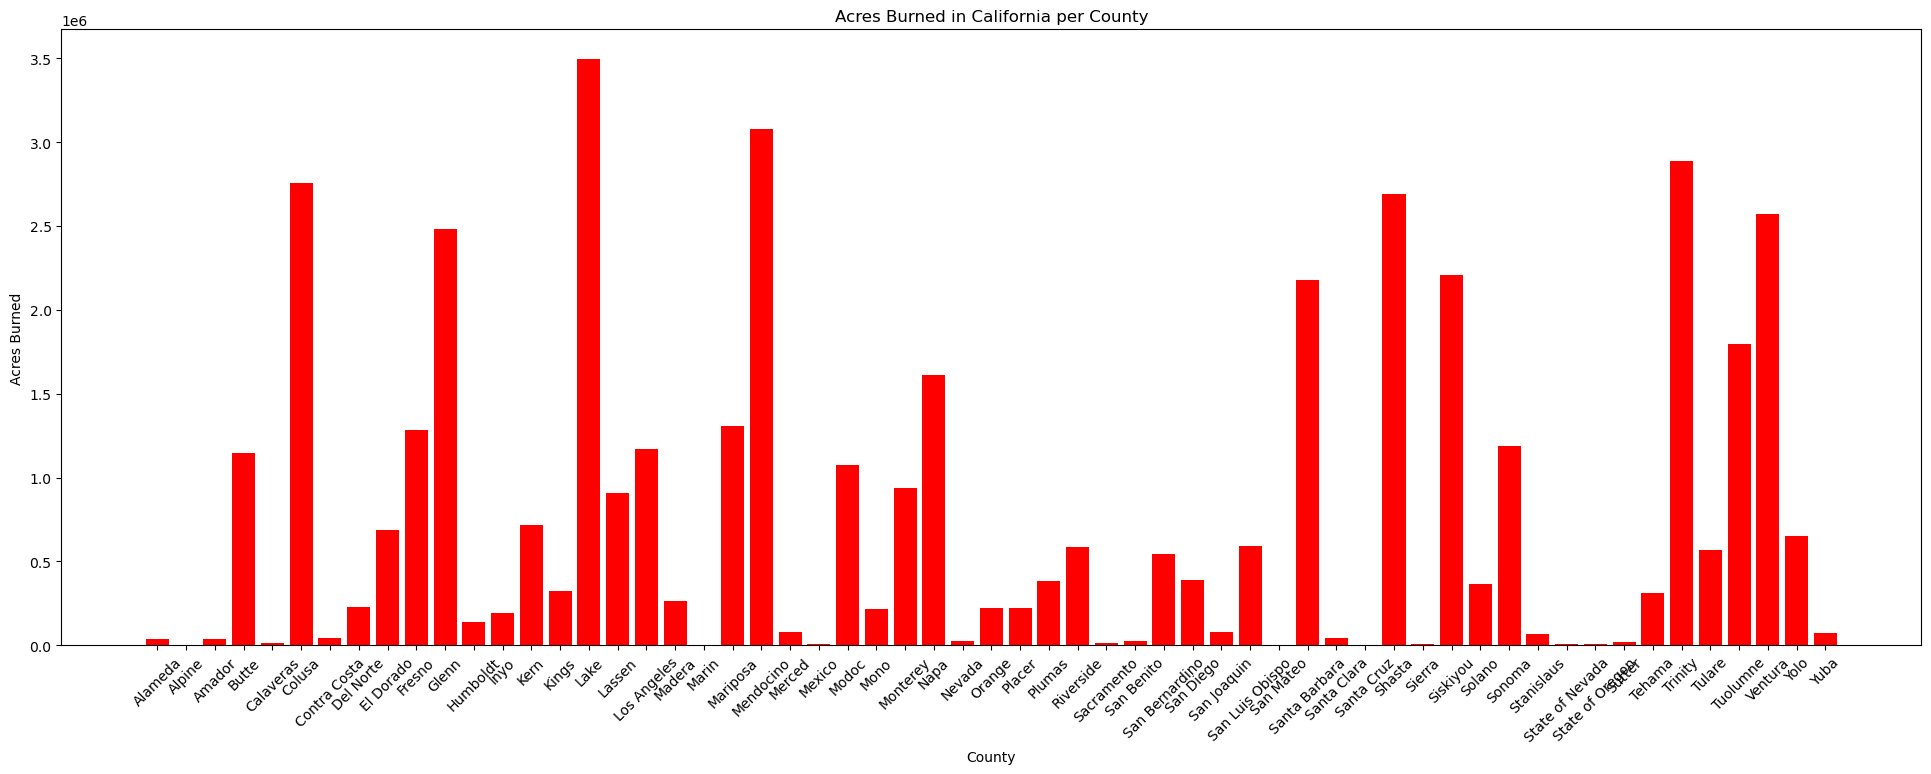

In [27]:
#num of acres burned per county plot

plt.figure(figsize=(24, 8))
plt.bar(AcresBurned.county, AcresBurned.acres_burned, color="red")
plt.title("Acres Burned in California per County")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.ylabel("Acres Burned")
plt.show()

In [28]:
con.close()
engine.dispose()